In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")

In [ ]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.shape

(1460, 81)

In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
from sklearn.model_selection import train_test_split

data = data.drop(columns=['Id']).dropna(axis=1)

y = data["SalePrice"]
X = data.drop(columns=["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

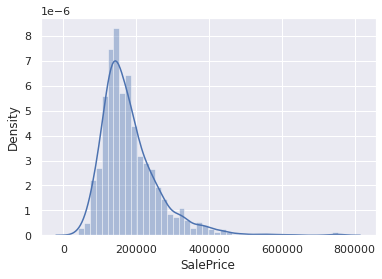

In [ ]:
sns.distplot(y_train)

$$\text{RMSE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} (y_i - a(x_i))^2}$$

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import make_scorer, mean_squared_error

In [ ]:
num_features = X.select_dtypes(include=np.number).columns.tolist()

In [ ]:
X_train

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
912,30,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,5,7,1925,1950,Gable,CompShg,MetalSd,MetalSd,TA,TA,BrkTil,489,0,279,768,GasA,TA,N,1015,0,0,1015,0,0,1,0,3,1,TA,6,Min1,0,1,450,Y,0,0,112,0,120,0,620,7,2006,WD,Abnorml
373,20,RL,10634,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1953,1953,Gable,CompShg,MetalSd,MetalSd,TA,TA,PConc,428,180,0,608,GasA,TA,Y,1319,0,0,1319,1,0,1,0,3,1,TA,5,Min2,0,1,270,Y,66,0,0,0,0,0,0,11,2009,WD,Normal
20,60,RL,14215,Pave,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,0,0,1158,1158,GasA,Ex,Y,1158,1218,0,2376,0,0,3,1,4,1,Gd,9,Typ,1,3,853,Y,240,154,0,0,0,0,0,11,2006,New,Partial
800,60,RL,12798,Pave,IR1,HLS,AllPub,Inside,Mod,ClearCr,Feedr,Norm,1Fam,2Story,6,5,1997,1997,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,462,0,154,616,GasA,Gd,Y,616,1072,0,1688,1,0,2,1,4,1,Gd,8,Typ,0,2,603,Y,403,114,185,0,0,0,400,5,2008,WD,Normal
152,60,RL,14803,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,5,1971,1971,Gable,CompShg,HdBoard,HdBoard,TA,TA,CBlock,416,0,409,825,GasA,Gd,Y,1097,896,0,1993,0,0,2,1,4,1,TA,8,Typ,1,2,495,Y,0,66,0,0,0,0,0,6,2006,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,190,RM,10800,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,1.5Fin,6,7,1905,2000,Gable,CompShg,Wd Sdng,Wd Sdng,TA,TA,BrkTil,0,0,482,482,GasA,Ex,N,1221,691,0,1912,0,0,2,0,3,2,TA,7,Typ,1,2,672,Y,0,25,212,0,0,0,0,4,2008,WD,Normal
1344,60,RL,11103,Pave,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,0,0,728,728,GasA,Ex,Y,728,728,0,1456,0,0,2,1,3,1,Gd,8,Typ,1,2,440,Y,0,0,0,0,0,0,0,7,2007,New,Partial
527,60,RL,14948,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Ex,TA,PConc,1330,0,122,1452,GasA,Ex,Y,1476,1237,0,2713,1,0,2,1,3,1,Ex,11,Typ,1,3,858,Y,126,66,0,0,0,0,0,11,2008,New,Partial
1149,70,RM,9000,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2Story,7,9,1920,1988,Hip,CompShg,VinylSd,VinylSd,TA,Gd,PConc,624,0,26,650,GasA,Ex,Y,832,650,0,1482,0,1,1,0,3,1,TA,7,Typ,0,2,324,Y,0,0,0,0,0,0,0,7,2009,WD,Normal


In [ ]:
lr = LinearRegression()
lr.fit(X_train[num_features], y_train)


LinearRegression()

In [ ]:
lasso = Lasso()
lasso.fit(X_train[num_features], y_train)

Lasso()

In [ ]:
ridge = Ridge()
ridge.fit(X_train[num_features], y_train)

Ridge()

In [ ]:
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, lr.predict(X_test[num_features]))))
lr_score = make_scorer(mean_squared_error, squared=False, greater_is_better=False)
print("Linear Regression RMSE test score:", lr_score(lr, X_test[num_features], y_test))

Linear Regression RMSE: 32360.487732146918
Linear Regression RMSE test score: -32360.487732146918


In [ ]:
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, lasso.predict(X_test[num_features]))))
lasso_score = make_scorer(mean_squared_error, squared=False, greater_is_better=False)
print("Lasso RMSE test score:", lasso_score(lasso, X_test[num_features], y_test))

Lasso RMSE: 32359.066540910586
Lasso RMSE test score: -32359.066540910586


In [ ]:
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, ridge.predict(X_test[num_features]))))
ridge_score = make_scorer(mean_squared_error, squared=False, greater_is_better=False)
print("Ridge RMSE test score:", ridge_score(ridge, X_test[num_features], y_test))


Ridge RMSE: 32346.992870138718
Ridge RMSE test score: -32346.992870138718


In [ ]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

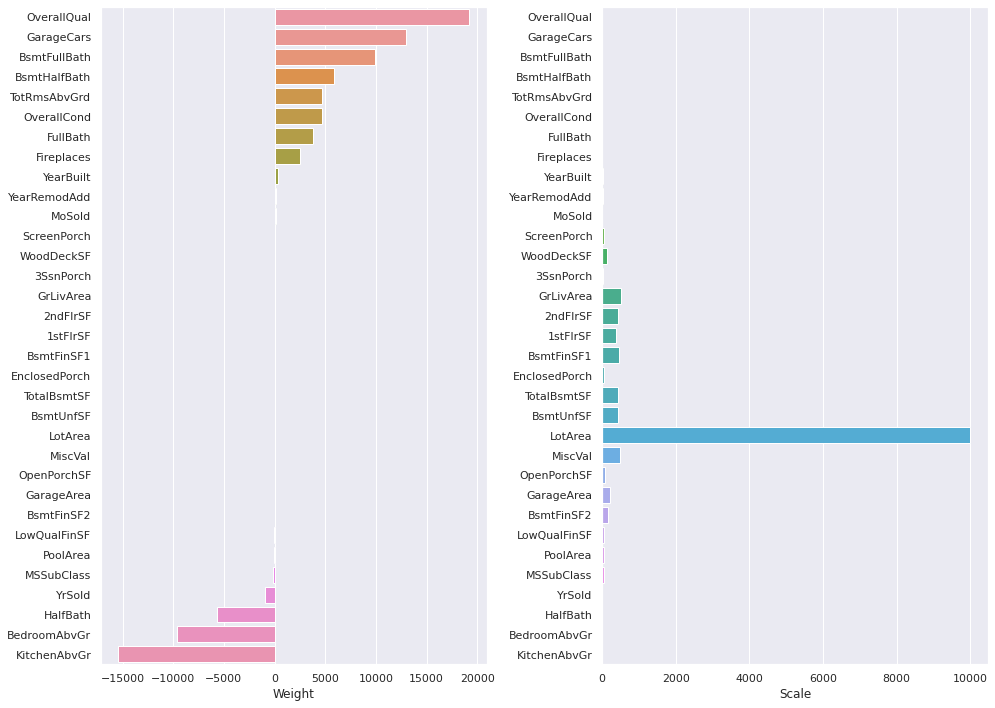

In [ ]:
show_weights(num_features, lr.coef_, X[num_features].std())


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_features])
X_train_scaled = X_train
X_test_scaled = X_test
X_train_scaled[num_features] = scaler.transform(X_train[num_features])
X_test_scaled[num_features] = scaler.transform(X_test[num_features])

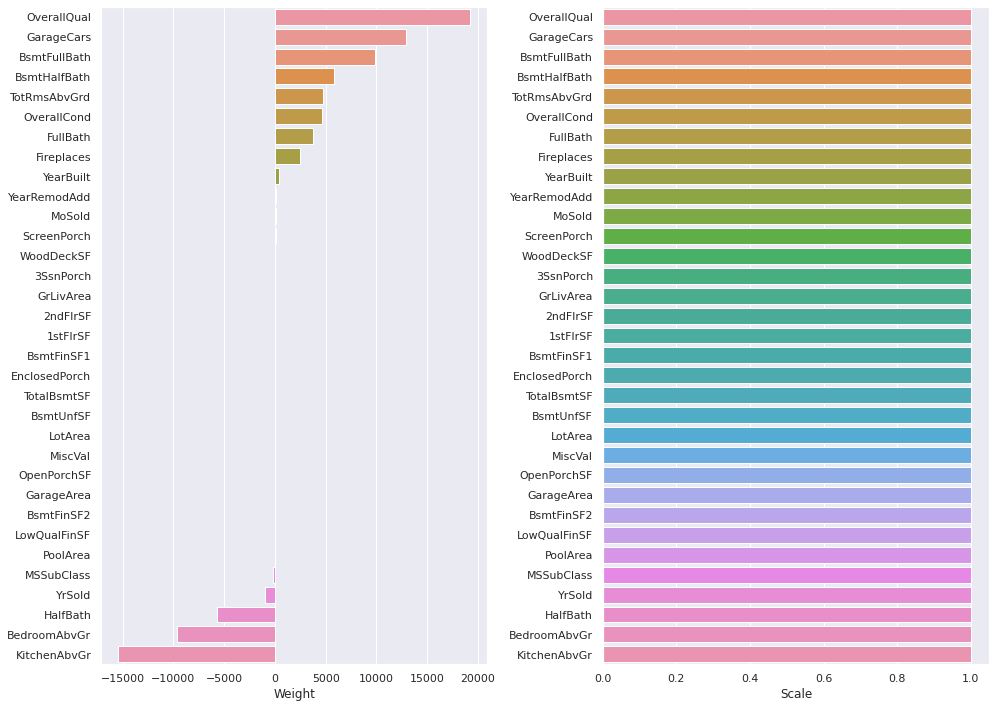

In [ ]:
scales = pd.Series(data=X_train_scaled.std(axis=0), index=num_features)
show_weights(num_features, lr.coef_, scales)

In [ ]:
from sklearn.model_selection import GridSearchCV


gs_ridge = GridSearchCV(ridge,[{'alpha': np.linspace(0, 1000, 1100)}], cv=5, verbose=1, scoring=ridge_score)
gs_ridge.fit(X_train[num_features], y_train)

Fitting 5 folds for each of 1100 candidates, totalling 5500 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': array([0.00000000e+00, 9.09918107e-01, 1.81983621e+00, ...,
       9.98180164e+02, 9.99090082e+02, 1.00000000e+03])}],
             scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False),
             verbose=1)

In [ ]:
gs_lasso = GridSearchCV(lasso,[{'alpha': np.linspace(0, 1000, 1100)}], cv=5, verbose=1, scoring=lasso_score)
gs_lasso.fit(X_train[num_features], y_train)

Fitting 5 folds for each of 1100 candidates, totalling 5500 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': array([0.00000000e+00, 9.09918107e-01, 1.81983621e+00, ...,
       9.98180164e+02, 9.99090082e+02, 1.00000000e+03])}],
             scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False),
             verbose=1)

In [ ]:
improve_lasso = Lasso(alpha=gs_lasso.best_params_['alpha'])
improve_lasso.fit(X_train[num_features], y_train)

improve_ridge = Ridge(alpha=gs_ridge.best_params_['alpha'])
improve_ridge.fit(X_train[num_features], y_train)

print(f'improve Lasso RMSE score : {lasso_score(improve_lasso, X_test[num_features], y_test)}')
print(f'improve Ridge RMSE score : {ridge_score(improve_ridge, X_test[num_features], y_test)}')

improve Lasso RMSE score : -110444756.60285766
improve Ridge RMSE score : -100799906.06669231


In [ ]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

In [ ]:
X_train[categorical].sample(5)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
1098,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,TA,TA,BrkTil,GasA,TA,Y,TA,Typ,Y,WD,Normal
302,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1258,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
406,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,TA,TA,BrkTil,GasA,Ex,Y,TA,Maj2,Y,WD,Normal
504,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,2Story,Gable,CompShg,Plywood,Brk Cmn,TA,TA,CBlock,GasA,TA,Y,TA,Typ,Y,WD,Normal


In [ ]:
from sklearn.preprocessing import OneHotEncoder
column_transformer = OneHotEncoder()
column_transformer.fit(X_train[categorical])

OneHotEncoder()

In [ ]:
print("Size before OneHot:", X_train[categorical].shape)
print("Size after OneHot:", column_transformer.transform(X_train[categorical]).shape)

Size before OneHot: (1022, 27)
Size after OneHot: (1022, 175)


In [ ]:
# Обучите линейную регрессию с l1 и l2 регуляризаторами
x_train = X_train.join(pd.get_dummies(X_train[categorical])).drop(columns=categorical) 
x_test = X_test.join(pd.get_dummies(X_test[categorical])).drop(columns=categorical) 
l1 = Lasso()
l1.fit(x_train, y_train)
l2 = Ridge()
l2.fit(x_train, y_train)

Ridge()

In [ ]:
lasso_zeros = np.sum(l1.coef_ == 0)
ridge_zeros = np.sum(l2.coef_ == 0)
print("Ridge zeroes:", ridge_zeros)
print("Lasso zeroes:", lasso_zeros)

Ridge zeroes: 0
Lasso zeroes: 14


In [ ]:
gs_ridge1 = GridSearchCV(l2,[{'alpha': np.linspace(0, 1000, 1100)}], cv=5, verbose=1, scoring=ridge_score)
gs_ridge1.fit(x_train, y_train)

Fitting 5 folds for each of 1100 candidates, totalling 5500 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': array([0.00000000e+00, 9.09918107e-01, 1.81983621e+00, ...,
       9.98180164e+02, 9.99090082e+02, 1.00000000e+03])}],
             scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False),
             verbose=1)

In [ ]:
gs_lasso1 = GridSearchCV(l1,[{'alpha': np.linspace(0, 1000, 1100)}], cv=5, verbose=1, scoring=lasso_score)
gs_lasso1.fit(x_train, y_train)

Fitting 5 folds for each of 1100 candidates, totalling 5500 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': array([0.00000000e+00, 9.09918107e-01, 1.81983621e+00, ...,
       9.98180164e+02, 9.99090082e+02, 1.00000000e+03])}],
             scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False),
             verbose=1)

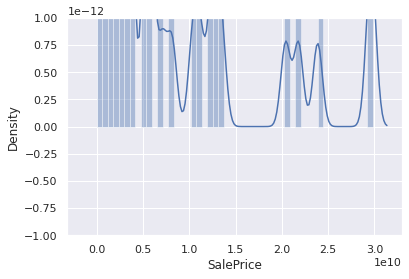

In [ ]:
error1 = (y_train - l1.predict(x_train)) ** 2

sns.distplot(error1)

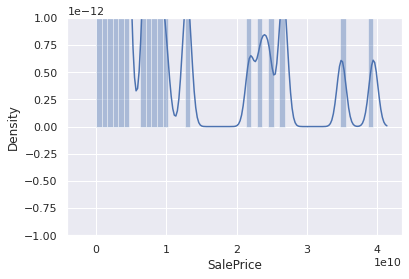

In [ ]:
error2 = (y_train - l2.predict(x_train)) ** 2
sns.distplot(error2)

Как видно из гистограммы, есть примеры с очень большими остатками. Попробуем их выбросить из обучающей выборки. Например, выбросим примеры, остаток у которых больше 0.95-квантили.

In [ ]:
filter_ = error1 < error1.quantile(0.95)

model1 = Lasso(alpha=gs_lasso1.best_params_['alpha'])
model2 = Ridge(alpha=gs_ridge1.best_params_['alpha'])

model1.fit(x_train[filter_], y_train[filter_])
model2.fit(x_train[filter_], y_train[filter_])

Ridge(alpha=9.099181073703367)

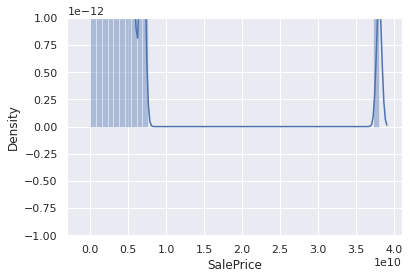

In [ ]:
error3 = (y_train[filter_] - model1.predict(x_train[filter_])) ** 2
sns.distplot(error3)

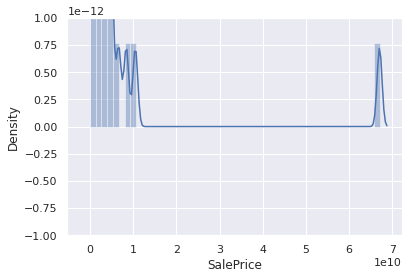

In [ ]:
error4 = (y_train[filter_] - model2.predict(x_train[filter_])) ** 2
sns.distplot(error4)

In [ ]:
print((lasso_score(model1, x_train[filter_], y_train[filter_])))

-18072.375581549528


In [ ]:
print((ridge_score(model2, x_train[filter_], y_train[filter_])))

-18898.533526776737
